In [1]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the train.csv file into a DataFrame
train = pd.read_csv('train.csv')  # Replace 'train.csv' with your actual file path if different

# List of numerical columns to plot
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[column], kde=True, bins=30, color='blue')  # Histogram with KDE
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [2]:
train.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [3]:
print(train.shape)

(204277, 18)


In [4]:
train.isna().sum() #checking for null values


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
null_value_percentages=(train.isna().sum()/train.shape[0])*100
print(null_value_percentages)

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64


In [6]:
train.drop_duplicates(inplace=True) #checking for duplicates and droping them
print(train.shape)

(204277, 18)


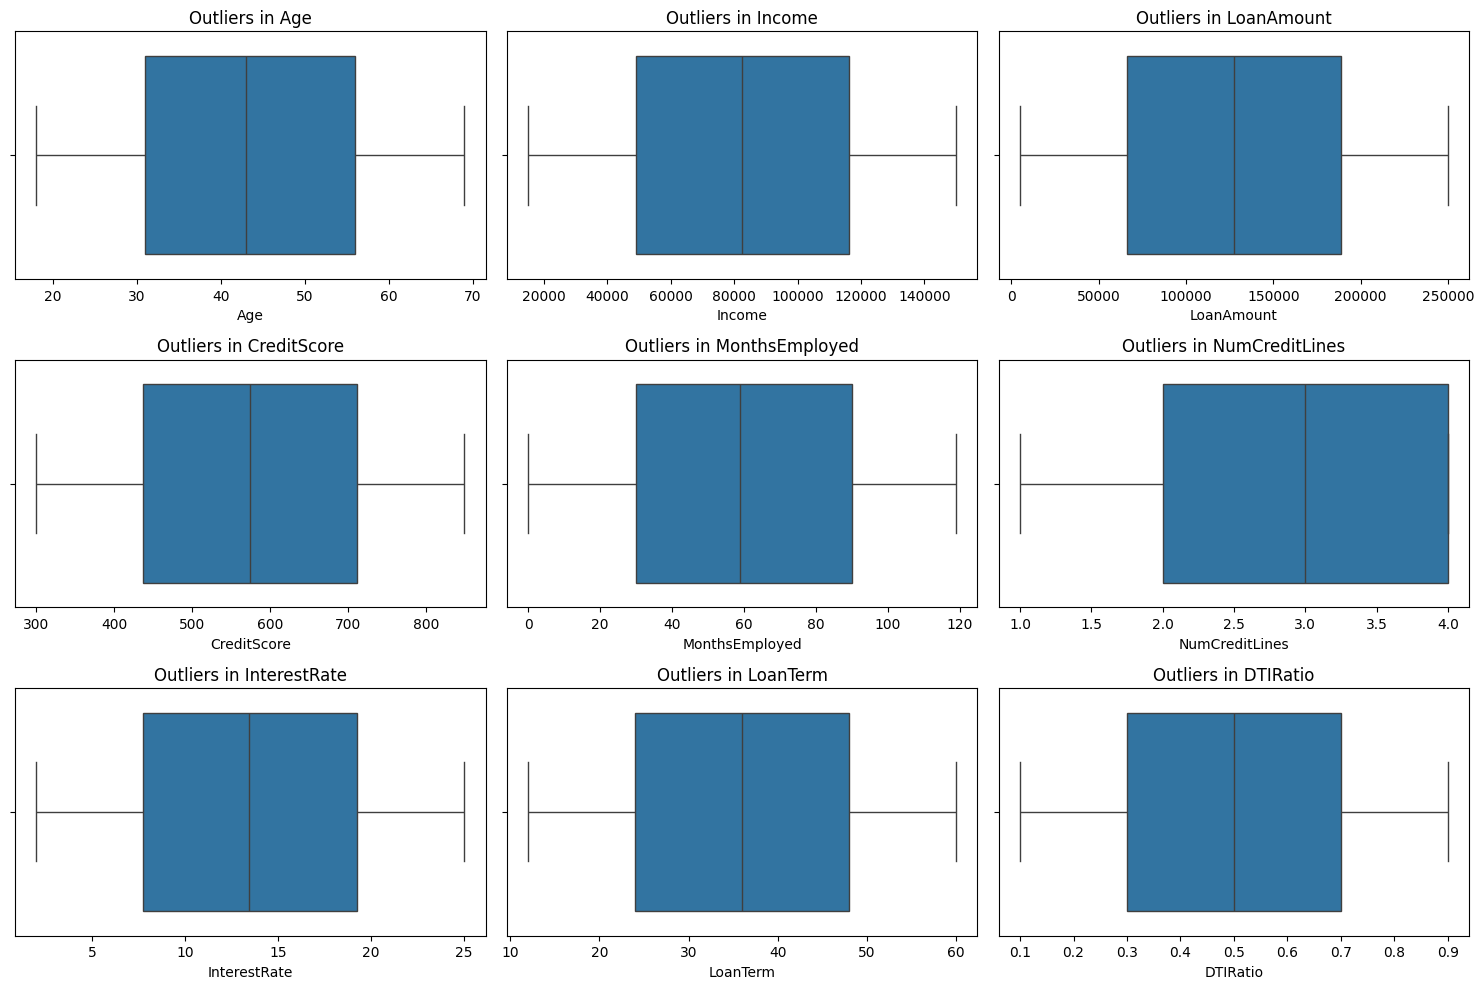

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for outlier detection
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Identifying outliers using the IQR method
outliers = {}
for column in numerical_columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = train[(train[column] < (Q1 - 1.5 * IQR)) | (train[column] > (Q3 + 1.5 * IQR))]

# Plotting outliers for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[column])
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


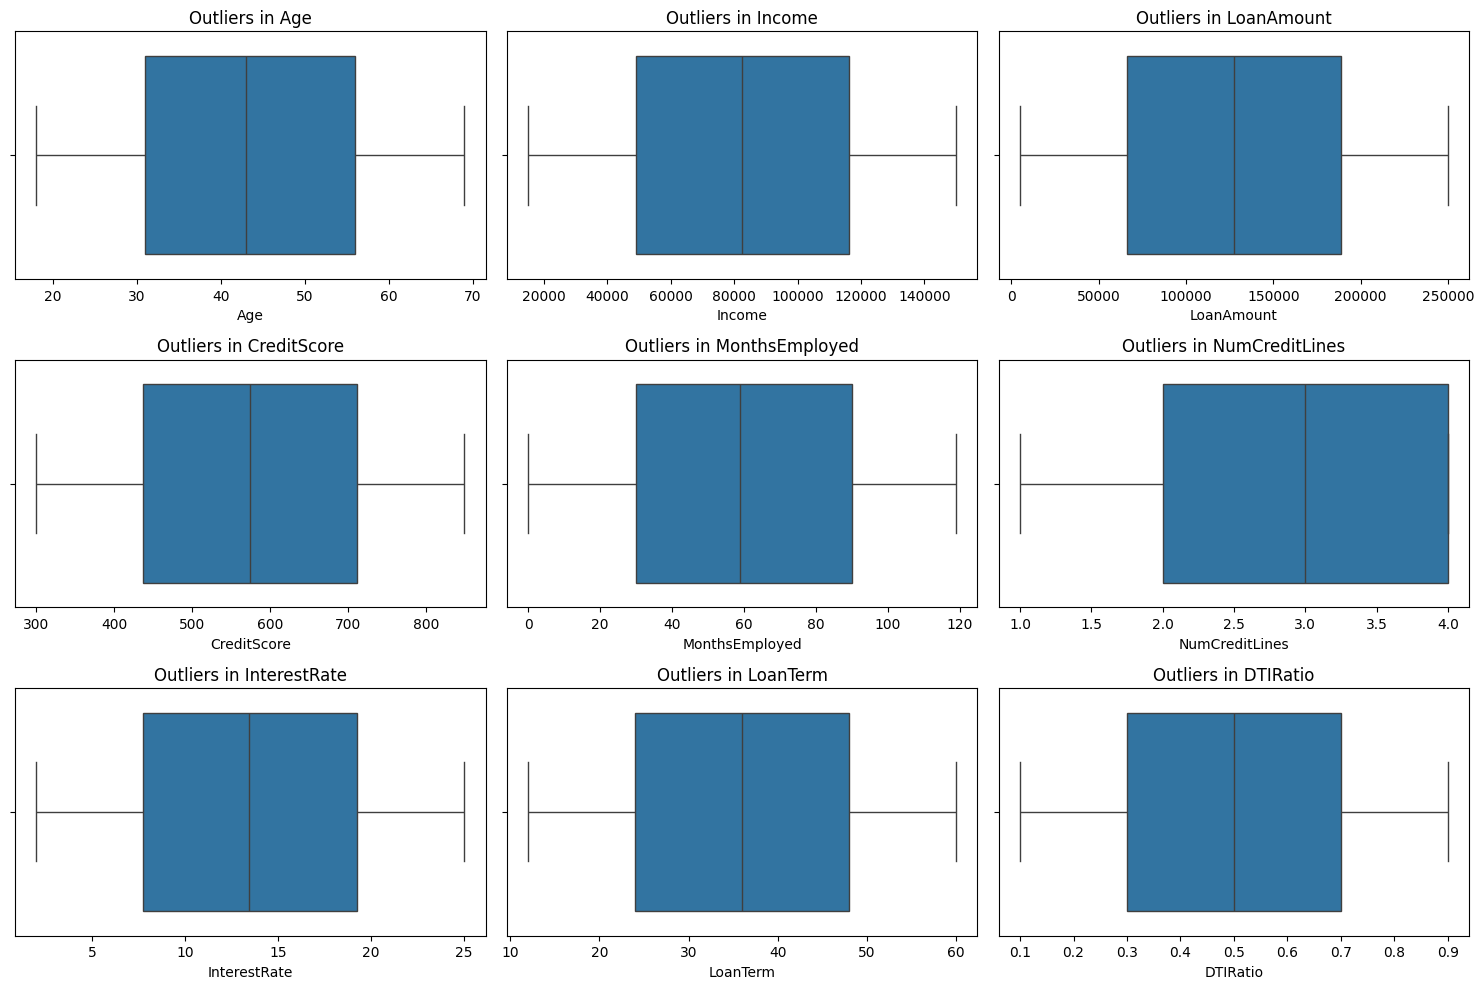

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for outlier detection
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                     'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                     'LoanTerm', 'DTIRatio']

# Plotting outliers for each numerical column without removing them
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[column])  # train is your original trainFrame
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


plotted loan amount after outlier removal

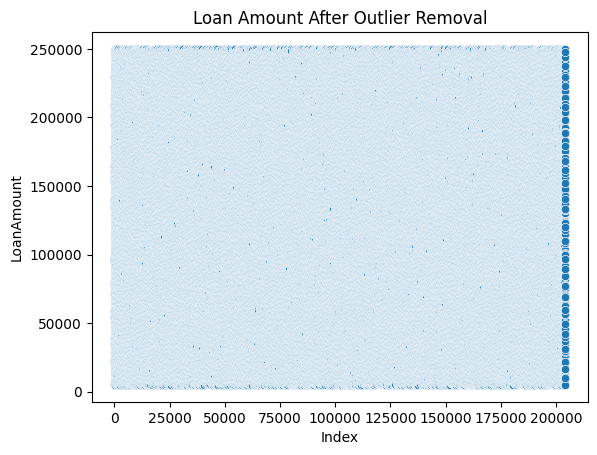

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the outlier removal class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Removing outliers from each numerical column
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)

# Scaling and Standardizing the trainset
scaler = MinMaxScaler()  # For scaling to a range
standardizer = StandardScaler()  # For standardizing to zero mean and unit variance

# Apply scaling
scaled_train = pd.DataFrame(scaler.fit_transform(train[numerical_columns]), columns=numerical_columns)

# Apply standardization
standardized_train = pd.DataFrame(standardizer.fit_transform(train[numerical_columns]), columns=numerical_columns)

# Visualize LotFrontage column after outlier removal with scatter plot
sns.scatterplot(x=range(len(train['LoanAmount'])), y=train['LoanAmount'])
plt.title('Loan Amount After Outlier Removal')
plt.xlabel('Index')
plt.ylabel('LoanAmount')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


XG Boost using Hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Standardization and Normalization
scaler = MinMaxScaler()  # Min-Max scaling
standardizer = StandardScaler()  # Standard scaling to zero mean, unit variance

# Scale and standardize each numerical column individually to avoid memory issues
for column in numerical_columns:
    # Apply Min-Max Scaling
    train[column] = scaler.fit_transform(train[[column]])
    test_data[column] = scaler.transform(test_data[[column]])
    
    # Apply Standardization
    train[column] = standardizer.fit_transform(train[[column]])
    test_data[column] = standardizer.transform(test_data[[column]])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb = XGBClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

# Grid search with cross-validation, adding verbose=1 to print progress
print("Starting GridSearchCV for XGBoost...")
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
print("Training the best model...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = best_model.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


/home/mannepalli/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Starting GridSearchCV for XGBoost...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation accuracy:

Tried to use Random Forest but got NaN values after standardisation

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values before preprocessing:\n", train.isnull().sum())
print("Test data null values before preprocessing:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Standardization and Normalization
scaler = MinMaxScaler()  # Min-Max scaling
standardizer = StandardScaler()  # Standard scaling to zero mean, unit variance

# Scale and standardize each numerical column individually to avoid memory issues
for column in numerical_columns:
    # Apply Min-Max Scaling
    train[column] = scaler.fit_transform(train[[column]])
    test_data[column] = scaler.transform(test_data[[column]])
    
    # Apply Standardization
    train[column] = standardizer.fit_transform(train[[column]])
    test_data[column] = standardizer.transform(test_data[[column]])

# Print the values after standardization
print("Train data after standardization:\n", train[numerical_columns].head())
print("Test data after standardization:\n", test_data[numerical_columns].head())

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid search with cross-validation, adding verbose=1 to print progress
print("Starting GridSearchCV for RandomForest...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
print("Training the best model...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the validation set
print("Making predictions on the validation set...")
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = best_model.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


Train data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Train data after standardization:
         Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0 -1.699838  1.413785    1.151487     1.711544       -0.967182   
1  0.234120 -0.6

ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 957, in check_array
    _assert_all_finite(
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/home/mannepalli/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


removed the rows with Nan values but it index didn't match

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values before preprocessing:\n", train.isnull().sum())
print("Test data null values before preprocessing:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Standardization and Normalization
scaler = MinMaxScaler()  # Min-Max scaling
standardizer = StandardScaler()  # Standard scaling to zero mean, unit variance

# Scale and standardize each numerical column individually to avoid memory issues
for column in numerical_columns:
    # Apply Min-Max Scaling
    train[column] = scaler.fit_transform(train[[column]])
    test_data[column] = scaler.transform(test_data[[column]])
    
    # Apply Standardization
    train[column] = standardizer.fit_transform(train[[column]])
    test_data[column] = standardizer.transform(test_data[[column]])

# Drop rows with NaN values after standardization
train = train.dropna()
test_data = test_data.dropna()

# Print the values after standardization and removing NaN values
print("Train data after standardization and NaN removal:\n", train[numerical_columns].head())
print("Test data after standardization and NaN removal:\n", test_data[numerical_columns].head())

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid search with cross-validation, adding verbose=1 to print progress
print("Starting GridSearchCV for RandomForest...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
print("Training the best model...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the validation set
print("Making predictions on the validation set...")
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = best_model.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


Train data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Train data after standardization and NaN removal:
         Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0 -1.699838  1.413785    1.151487     1.711544       -0.967182   


ValueError: array length 38513 does not match index length 51070

Used HistGradientBoosting Classifier

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Identify numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Apply outlier removal on numerical columns in train and test data
for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the HistGradientBoosting model (handles NaNs natively)
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)

# Make predictions on the validation set
print("Making predictions on the validation set...")
y_pred = hgb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = hgb.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Making predictions on the validation set...
Validation accuracy: 0.8848
Making predictions on the test set...
Submission file 'sample_submission.csv' created successfully.


Used HistGradientBoostingClassifier with GridSearchCV and Hyperparameter Tuning

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Identify numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Apply outlier removal on numerical columns in train and test data
for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [20, 30],
    'l2_regularization': [0, 0.1, 1.0]
}

# Define and train the HistGradientBoosting model with GridSearchCV for hyperparameter tuning
hgb = HistGradientBoostingClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best hyperparameters found: ", grid_search.best_params_)

# Get the best model from the grid search
best_hgb = grid_search.best_estimator_

# Make predictions on the validation set using the best model
print("Making predictions on the validation set...")
y_pred = best_hgb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = best_hgb.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Best hyperparameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 200, 'min_samples_leaf': 30}
Making predictions on the validation set...
Validation accuracy: 0.8854
Making predictions

Used HistGradientBoostingClassifier with RandomizedSearchCV and KNN imputer(Highest accuracy)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Identify numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Apply outlier removal on numerical columns in train and test data
for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(knn_imputer.transform(X_val), columns=X_val.columns)
test_data = pd.DataFrame(knn_imputer.transform(test_data), columns=test_data.columns)

# Define parameter distributions for RandomizedSearchCV
param_dist_hgb = {
    'learning_rate': uniform(0.01, 0.2), 
    'max_depth': randint(3, 10),          
    'max_iter': randint(100, 300),        
    'min_samples_leaf': randint(20, 100), 
    'l2_regularization': uniform(0.0, 5.0),
}

# Train HistGradientBoostingClassifier with RandomizedSearchCV
hgb = HistGradientBoostingClassifier(random_state=42)
random_search_hgb = RandomizedSearchCV(
    estimator=hgb, param_distributions=param_dist_hgb, n_iter=30, cv=3, n_jobs=-1, scoring='accuracy', random_state=42
)
random_search_hgb.fit(X_train, y_train)

# Print the best parameters for HistGradientBoostingClassifier
print("Best hyperparameters for HistGradientBoostingClassifier: ", random_search_hgb.best_params_)

# Make predictions on the validation set
y_pred_hgb = random_search_hgb.best_estimator_.predict(X_val)

# Evaluate the model
accuracy_hgb = accuracy_score(y_val, y_pred_hgb)
print(f"Validation accuracy for HistGradientBoostingClassifier: {accuracy_hgb:.4f}")

# Make predictions on the test set
test_predictions_hgb = random_search_hgb.best_estimator_.predict(test_data)

# Prepare submission file
sample_submission_hgb = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions_hgb})
sample_submission_hgb.to_csv('sample_submission_hgb.csv', index=False)

print("Submission file 'sample_submission_hgb.csv' created successfully.")


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Best hyperparameters for HistGradientBoostingClassifier:  {'l2_regularization': 1.5585553804470549, 'learning_rate': 0.11401360423556216, 'max_depth': 4, 'max_iter': 103, 'min_samples_leaf': 73}
Validation accuracy for HistGr

Comparison of HistGradientBoosting and Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Identify numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Apply outlier removal on numerical columns in train and test data
for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(knn_imputer.transform(X_val), columns=X_val.columns)
test_data = pd.DataFrame(knn_imputer.transform(test_data), columns=test_data.columns)

# Define parameter grids for both models
param_grid_hgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0.0, 0.1, 1.0],
}

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

# Train HistGradientBoostingClassifier with GridSearchCV
hgb = HistGradientBoostingClassifier(random_state=42)
grid_search_hgb = GridSearchCV(estimator=hgb, param_grid=param_grid_hgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_hgb.fit(X_train, y_train)

# Print the best parameters for HistGradientBoostingClassifier
print("Best hyperparameters for HistGradientBoostingClassifier: ", grid_search_hgb.best_params_)

# Train LogisticRegression with GridSearchCV
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Print the best parameters for LogisticRegression
print("Best hyperparameters for LogisticRegression: ", grid_search_lr.best_params_)

# Make predictions on the validation set for both models
y_pred_hgb = grid_search_hgb.best_estimator_.predict(X_val)
y_pred_lr = grid_search_lr.best_estimator_.predict(X_val)

# Evaluate both models
accuracy_hgb = accuracy_score(y_val, y_pred_hgb)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Validation accuracy for HistGradientBoostingClassifier: {accuracy_hgb:.4f}")
print(f"Validation accuracy for LogisticRegression: {accuracy_lr:.4f}")

# Make predictions on the test set with both models
test_predictions_hgb = grid_search_hgb.best_estimator_.predict(test_data)
test_predictions_lr = grid_search_lr.best_estimator_.predict(test_data)

# Prepare submission files for both models
sample_submission_hgb = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions_hgb})
sample_submission_hgb.to_csv('sample_submission_hgb.csv', index=False)

sample_submission_lr = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions_lr})
sample_submission_lr.to_csv('sample_submission_lr.csv', index=False)

print("Submission files 'sample_submission_hgb.csv' and 'sample_submission_lr.csv' created successfully.")


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Best hyperparameters for HistGradientBoostingClassifier:  {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100, 'min_samples_leaf': 100}
Best hyperparameters for LogisticRegression:  {'C': 1, 'solv

DecisionTree Classifier with Hyperparameter Tuning

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Scaling and standardization
scaler = MinMaxScaler()
standardizer = StandardScaler()

# Scale and standardize each numerical column individually to avoid memory issues
for column in numerical_columns:
    # Apply Min-Max Scaling
    train[column] = scaler.fit_transform(train[[column]])
    test_data[column] = scaler.transform(test_data[[column]])
    
    # Apply Standardization
    train[column] = standardizer.fit_transform(train[[column]])
    test_data[column] = standardizer.transform(test_data[[column]])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = best_model.predict(test_data)

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_data.index, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8839806401901456


Used HistGradientBoostingClassifier with more hyperparameters using RandomizedSearchCV

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Save LoanID for submission purposes
loan_ids = test_data['LoanID'].copy()

# Check for null values
print("Train data null values:\n", train.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data only
train = train.drop(columns=['LoanID'])

# Scaling and standardization
scaler = MinMaxScaler()
standardizer = StandardScaler()

# Scale and standardize each numerical column individually to avoid memory issues
for column in numerical_columns:
    # Apply Min-Max Scaling
    train[column] = scaler.fit_transform(train[[column]])
    test_data[column] = scaler.transform(test_data[[column]])
    
    # Apply Standardization
    train[column] = standardizer.fit_transform(train[[column]])
    test_data[column] = standardizer.transform(test_data[[column]])

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Hist Gradient Boosting model
hist_gb = HistGradientBoostingClassifier(random_state=42)

# Define hyperparameters for tuning using RandomizedSearchCV
param_distributions = {
    'learning_rate': uniform(0.01, 0.2),
    'max_iter': randint(50, 300),
    'max_leaf_nodes': randint(10, 50),
    'max_depth': randint(3, 10),
    'min_samples_leaf': randint(1, 10),
    'l2_regularization': uniform(0.0, 1.0),
    'max_bins': randint(50, 255),
    'early_stopping': [True, False]
}

# Random search with cross-validation
random_search = RandomizedSearchCV(estimator=hist_gb, param_distributions=param_distributions, 
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Train the final model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = best_model.predict(test_data.drop(columns=['LoanID']))

# Prepare the sample submission file using the saved loan_ids
sample_submission = pd.DataFrame({'LoanID': loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)


Train data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Best parameters: {'early_stopping': False, 'l2_regularization': 0.8832802589188683, 'learning_rate': 0.07486900420105479, 'max_bins': 141, 'max_depth': 3, 'max_iter': 280, 'max_leaf_nodes': 42, 'min_samples_leaf': 1}
Best cro

Used RandomForest using GridSearch CV and Hyperparameter Tuning

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

# Setting random seed for reproducibility
np.random.seed(42)

# Load the train and test datasets
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for null values
print("Train data null values before preprocessing:\n", train.isnull().sum())
print("Test data null values before preprocessing:\n", test_data.isnull().sum())

# Remove duplicates from train data if any
train = train.drop_duplicates()

# Store LoanID from test data for the final submission
test_loan_ids = test_data['LoanID']

# Define the OutlierRemoval class
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5

    def remove(self, row):
        if self.lower_whisker <= row <= self.upper_whisker:
            return row
        elif row < self.lower_whisker:
            return self.lower_whisker
        else:
            return self.upper_whisker

# Apply outlier removal on numerical columns in train and test data
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for column in numerical_columns:
    remover = OutlierRemoval(train[column])
    train[column] = train[column].apply(remover.remove)
    
    test_remover = OutlierRemoval(test_data[column])
    test_data[column] = test_data[column].apply(test_remover.remove)

# Define mappings for categorical columns
mappings = {
    'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 2},
    'Education': {'High School': 0, "Bachelor's": 1, 'Master\'s': 2},
    'EmploymentType': {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3},
    'HasMortgage': {'Yes': 1, 'No': 0},
    'HasDependents': {'Yes': 1, 'No': 0},
    'LoanPurpose': {'Home': 0, 'Auto': 1, 'Education': 2, 'Business': 3, 'Other': 4},
    'HasCoSigner': {'Yes': 1, 'No': 0}
}

# Apply mappings to train and test data
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

# Feature engineering: Combine MaritalStatus and HasDependents into a new feature
train['Marital_Dependents'] = train['MaritalStatus'] + train['HasDependents']
test_data['Marital_Dependents'] = test_data['MaritalStatus'] + test_data['HasDependents']

# Drop the LoanID column from train data (not needed for training)
train = train.drop(columns=['LoanID'])
test_data = test_data.drop(columns=['LoanID'])

# Apply KNN Imputer to fill missing values
print("Applying KNN Imputer to fill missing values...")
knn_imputer = KNNImputer(n_neighbors=5)

# Combine train and test for consistent imputation
combined_data = pd.concat([train, test_data], ignore_index=True)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(combined_data), columns=combined_data.columns)

# Split imputed data back into train and test
train = imputed_data.iloc[:train.shape[0]].copy()
test_data = imputed_data.iloc[train.shape[0]:].copy()

# Ensure the target column is integers
train['Default'] = train['Default'].astype(int)

# Print the train and test datasets after preprocessing and imputing
print("Train data after preprocessing and imputing:\n", train.head())
print("Test data after preprocessing and imputing:\n", test_data.head())

# Separate target variable
X = train.drop(columns=['Default'])
y = train['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid search with cross-validation, adding verbose=1 to print progress
print("Starting GridSearchCV for RandomForest...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Train the final model with the best parameters
print("Training the best model...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the validation set
print("Making predictions on the validation set...")
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Make predictions on the test set
print("Making predictions on the test set...")
test_predictions = best_model.predict(test_data.drop(columns=['Default'], errors='ignore'))

# Prepare the sample submission file
sample_submission = pd.DataFrame({'LoanID': test_loan_ids, 'Default': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)
print("Submission file 'sample_submission.csv' created successfully.")


Train data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
Test data null values before preprocessing:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
Applying KNN Imputer to fill missing values...
Train data after preprocessing and imputing:
     Age    Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  18.0  137